In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (17,8)

In [39]:
df=pd.read_csv('df_prepared.csv')

In [40]:
df.shape

(17710, 5)

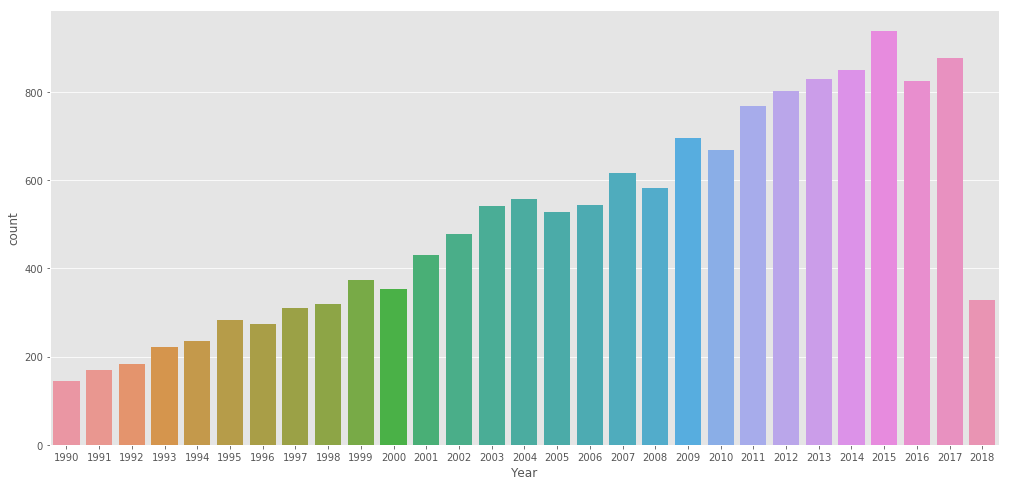

In [41]:
sns.countplot(df.Year[df.Year>=1990].astype(int))

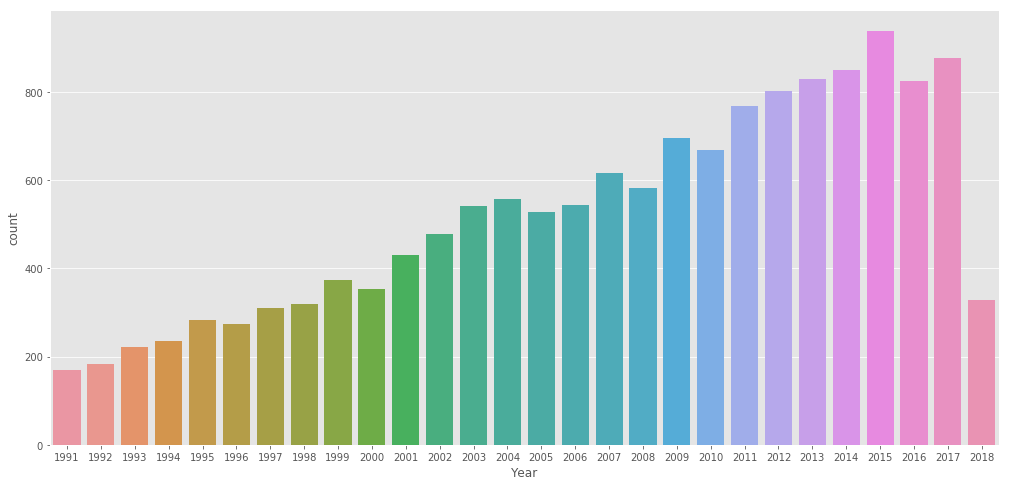

In [42]:
sns.countplot(df.Year[df.Year>1990].astype(int))

In [43]:
groups=7

In [44]:
years=df.Year.astype(int)
cumsum=np.cumsum(years.value_counts().sort_index())
cumsum=(cumsum/ (df.shape[0] / groups)).astype(int)
df['Year']=df.Year.astype(int)
df['Epoch']=cumsum[df.Year].values
df.loc[df['Epoch']==groups,'Epoch']=groups-1

In [45]:
df.head()

,Artist,Song_name,Album,Year,Text,Epoch
0,Kingdom Come,Pushin' Hard,Kingdom Come,1988,I wish we'd end this suffering And all this ...,1
1,Kingdom Come,Stay,Hands Of Time,1991,"Now, I have found that the girl I love can't...",1
2,Kingdom Come,What Love Can Be,Kingdom Come,1988,Come to me now I want to be your best friend...,1
3,King Gizzard & The Lizard Wizard,Am I In Heaven?,I'm In Your Mind Fuzz,2014,I've got ideas in my brain About the end of ...,5
4,King Gizzard & The Lizard Wizard,Deserted Dunes Welcome Weary Feet,Polygondwanaland,2017,Deserted dunes welcome weary feet Feel eupho...,6


In [46]:
max_years=df.groupby(['Epoch'])['Year'].max()
min_years=df.groupby(['Epoch'])['Year'].min()
periods = zip(min_years,max_years)
print (max_years-min_years).values
print periods

[42 11  5  3  3  2  3]
[(1943, 1985), (1986, 1997), (1998, 2003), (2004, 2007), (2008, 2011), (2012, 2014), (2015, 2018)]


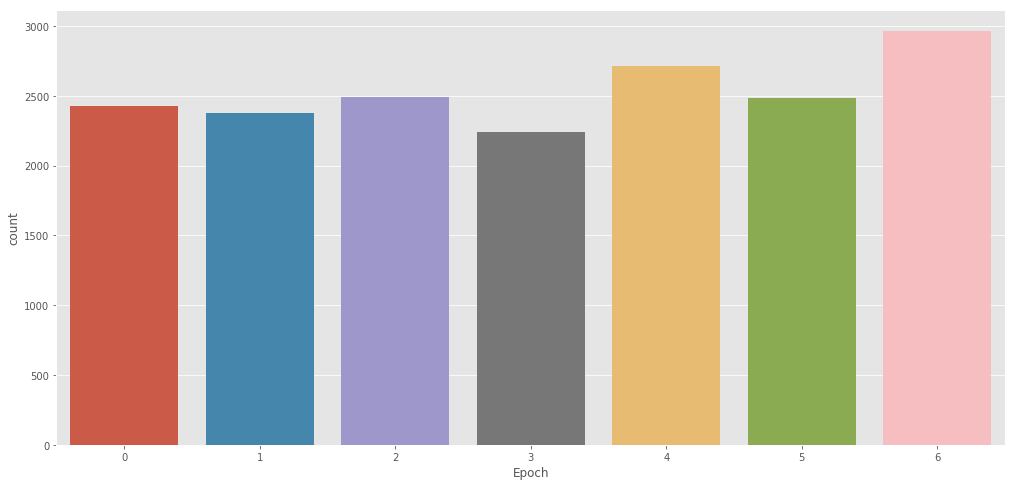

In [47]:
sns.countplot(df.Epoch)

In [48]:
df.groupby(['Epoch'])['Artist'].apply(np.unique).apply(np.shape)

Epoch
0     (629,)
1    (1062,)
2    (1393,)
3    (1473,)
4    (1787,)
5    (1730,)
6    (2045,)
Name: Artist, dtype: object

In [49]:
uniq_groups=df.groupby(['Epoch'])['Artist'].apply(np.unique).apply(np.shape)

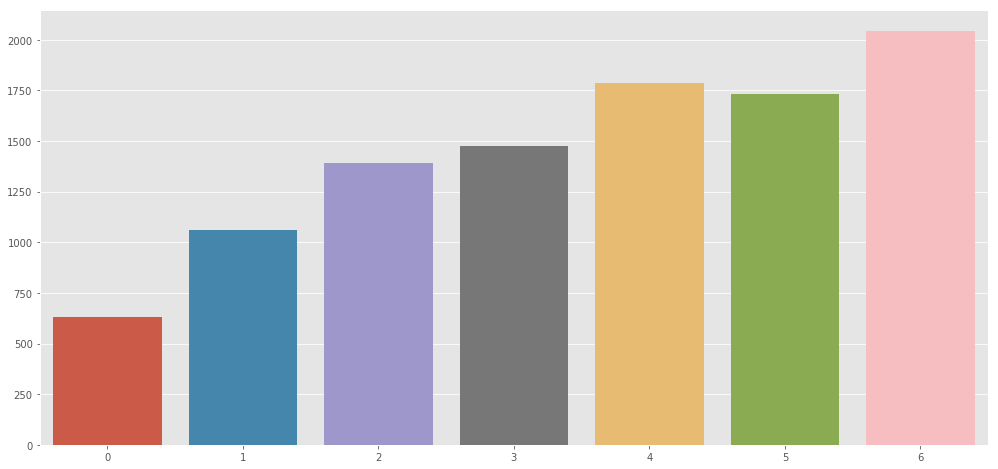

In [50]:
sns.barplot(y=[x[0] for x in uniq_groups],x=range(groups))

In [51]:
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+')
from nltk.corpus import stopwords
from collections import Counter
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [52]:
def func(df_):
    text=str(df_.values).decode('utf-8').lower()
    counter_list=[]
    counter_list.append(Counter([morph.parse(str(word))[0].normal_form for word in tokenizer.tokenize(text) if word not in stopwords.words('english')]))
    summed=Counter()
    for c in counter_list:
        summed+=c
    return summed.most_common(7)

In [53]:
def func_(df_):
    text=str(df_.values).decode('utf-8').lower()
    counter_list=[]
    counter_list.append(Counter([str(word) for word in tokenizer.tokenize(text) if word not in stopwords.words('english')]))
    summed=Counter()
    for c in counter_list:
        summed+=c
    return summed.most_common(7)

In [54]:
grouped=df.groupby(['Epoch'])['Text'].apply(func) #с лемматизацией

In [55]:
grouped_=df.groupby(['Epoch'])['Text'].apply(func_) #без

In [56]:
grouped

Epoch
0    [(know, 25), (say, 17), (day, 15), (come, 15),...
1    [(time, 23), (take, 19), (pry, 14), (open, 13)...
2    [(city, 19), (got, 15), (yeah, 14), (say, 11),...
3    [(dance, 10), (talk, 10), (rather, 10), (getti...
4    [(hot, 23), (stay, 16), (cold, 14), (rise, 12)...
5    [(played, 19), (fool, 17), (love, 14), (got, 1...
6    [(give, 34), (love, 27), (gotta, 17), (let, 16...
Name: Text, dtype: object

In [57]:
grouped_

Epoch
0    [(know, 25), (say, 17), (day, 15), (come, 15),...
1    [(time, 23), (take, 19), (pry, 14), (open, 13)...
2    [(city, 19), (got, 15), (yeah, 14), (say, 11),...
3    [(dance, 10), (talk, 10), (rather, 10), (getti...
4    [(hot, 23), (stay, 16), (cold, 14), (rise, 12)...
5    [(played, 19), (fool, 17), (love, 14), (got, 1...
6    [(give, 34), (love, 27), (gotta, 17), (let, 16...
Name: Text, dtype: object

In [58]:
for i,x in enumerate(grouped):
    print periods[i]
    print x
    print

(1943, 1985)
[('know', 25), ('say', 17), ('day', 15), ('come', 15), ('happy', 13), ('friends', 13), ('gonna', 12)]

(1986, 1997)
[('time', 23), ('take', 19), ('pry', 14), ('open', 13), ('gonna', 11), ('words', 11), ('want', 10)]

(1998, 2003)
[('city', 19), ('got', 15), ('yeah', 14), ('say', 11), ('see', 10), ('girl', 9), ('angels', 9)]

(2004, 2007)
[('dance', 10), ('talk', 10), ('rather', 10), ('getting', 8), ('swing', 8), ('deify', 6), ('made', 6)]

(2008, 2011)
[('hot', 23), ('stay', 16), ('cold', 14), ('rise', 12), ('oh', 12), ('fallen', 10), ('awake', 10)]

(2012, 2014)
[('played', 19), ('fool', 17), ('love', 14), ('got', 13), ('heaven', 12), ('infected', 12), ('manifested', 12)]

(2015, 2018)
[('give', 34), ('love', 27), ('gotta', 17), ('let', 16), ('stop', 14), ('see', 13), ('baby', 12)]



In [59]:
for i,x in enumerate(grouped_):
    print periods[i]
    print x
    print

(1943, 1985)
[('know', 25), ('say', 17), ('day', 15), ('come', 15), ('happy', 13), ('friends', 13), ('gonna', 12)]

(1986, 1997)
[('time', 23), ('take', 19), ('pry', 14), ('open', 13), ('gonna', 11), ('words', 11), ('want', 10)]

(1998, 2003)
[('city', 19), ('got', 15), ('yeah', 14), ('say', 11), ('see', 10), ('girl', 9), ('angels', 9)]

(2004, 2007)
[('dance', 10), ('talk', 10), ('rather', 10), ('getting', 8), ('swing', 8), ('deify', 6), ('made', 6)]

(2008, 2011)
[('hot', 23), ('stay', 16), ('cold', 14), ('rise', 12), ('oh', 12), ('fallen', 10), ('awake', 10)]

(2012, 2014)
[('played', 19), ('fool', 17), ('love', 14), ('got', 13), ('heaven', 12), ('infected', 12), ('manifested', 12)]

(2015, 2018)
[('give', 34), ('love', 27), ('gotta', 17), ('let', 16), ('stop', 14), ('see', 13), ('baby', 12)]

